# Data Analytics HW2 Linear Regression and Logistisc Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This HW is to practice building Linear and Loistic Regression model. Note that some questions will carry more weights than the others. 

### Part A

#### First let's build a Linear Regression model for a housing dataset

In [2]:
df = pd.read_csv("USA_housing.csv")
df.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.shape

(5000, 7)

In [4]:
df.isnull().any()

Income                  False
HouseAge                False
NumberOfRooms           False
AreaNumberOfBedrooms    False
Population              False
Price                   False
Address                 False
dtype: bool

### we can use simple scatter to check how the house price depends on different variables


<AxesSubplot:xlabel='NumberOfRooms', ylabel='Price'>

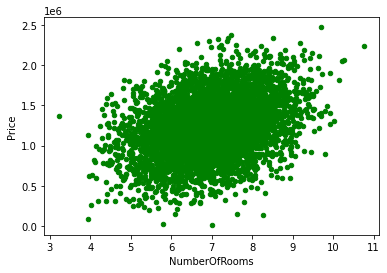

In [5]:
# For example
df.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

### Question 1: Do a pairplot and calculate all the pairwise correlation. Among all the numerical variables, rank them according to which one would impact the house price the most

Type your code here

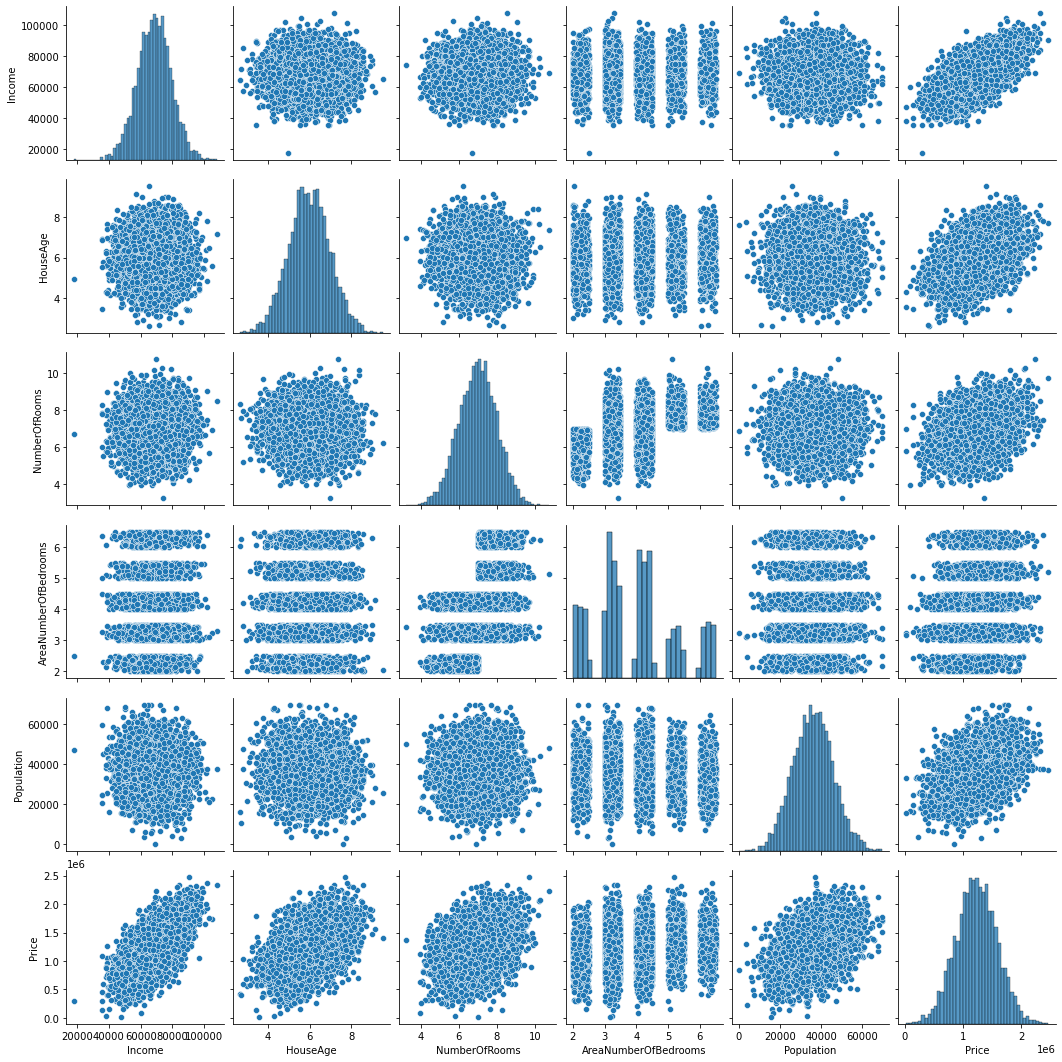

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Question 2: Use the top variable to build a one-variable Linear Regression model of the house price. Save 20% as your testing data. Do a scatter plot with the prediction vs the testing data set. Show your R-square and RMSE

Type your code here

In [8]:
xvar = df['Income'].values
yvar = df['Price'].values
X = xvar.reshape(-1,1)
Y = yvar.reshape(-1,1)

[-224617.80110797]
[[21.24368249]]


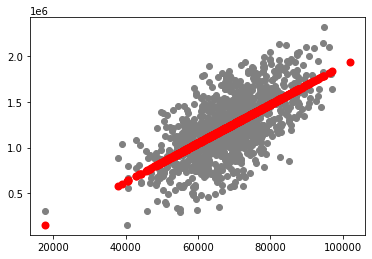

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model1 = LinearRegression()
model1.fit(X_train, Y_train)

print(model1.intercept_)
print(model1.coef_)

Y_pred = model1.predict(X_test)


plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [10]:
from sklearn import metrics

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error: 219728.3360181176
Mean Squared Error: 74084394120.77266
Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


### Question 3: Now, can you include a few more numerical variable to improve your model? Does your R-square improve?

By using what's next to income via correlation we can build upon and improve the model.

In [12]:
df.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [13]:
xvar = df[['Income', 'HouseAge']].values
#yvar = df['Price'].values
X = xvar.reshape(-1,2)
#Y = yvar.reshape(-1,1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)



[-1181216.65021218]
[[2.12204386e+01 1.60427782e+05]]


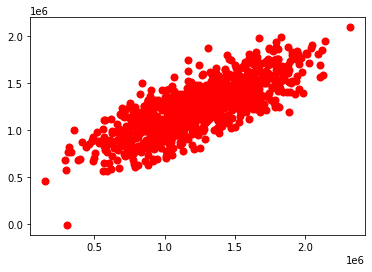

In [15]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error: 175582.84518684636
Mean Squared Error: 48062437588.67756
Root Mean Squared Error: 219231.47034282636
R-squared: 0.6111416177920193


An r-square of .611 is low so lets try adding more correlated data. 

[-2646630.53108702]
[[2.16604083e+01 1.65809651e+05 1.20329408e+05 1.52858855e+01
  2.19309558e+03]]


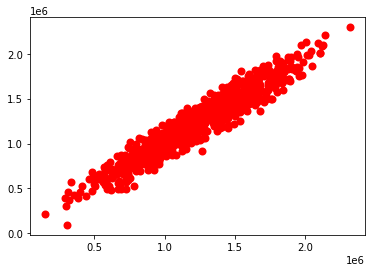

Mean Absolute Error: 82657.94604670361
Mean Squared Error: 10549721685.892015
Root Mean Squared Error: 102711.83810005551
R-squared: 0.9146454505152514


In [17]:
xvar = df[['Income', 'HouseAge', 'NumberOfRooms', 'Population', 'AreaNumberOfBedrooms']].values
#yvar = df['Price'].values
X = xvar.reshape(-1,5)
#Y = yvar.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))


### Question 4: Now do a 10-fold Cross Validation of your best model. Does your model pass cross validation?

Type your code and answer here

Trial 0, R-squared: 0.9188953616495056,  Slope: [[2.15974753e+01 1.65285107e+05 1.20327497e+05 1.52155653e+01
  1.45889729e+03]], Intercept: [-2632817.12510184],  
Trial 1, R-squared: 0.9229212341758337,  Slope: [[2.15845815e+01 1.65268635e+05 1.20543054e+05 1.51415267e+01
  1.77764936e+03]], Intercept: [-2632903.63750059],  
Trial 2, R-squared: 0.9116280571660424,  Slope: [[2.16402765e+01 1.65359098e+05 1.20708403e+05 1.52726165e+01
  2.20793724e+03]], Intercept: [-2646194.79617345],  
Trial 3, R-squared: 0.9121102032335502,  Slope: [[2.15198207e+01 1.64955407e+05 1.19563967e+05 1.51999904e+01
  3.39102443e+03]], Intercept: [-2629323.91856165],  
Trial 4, R-squared: 0.9227033582538798,  Slope: [[2.16610150e+01 1.64256878e+05 1.20753335e+05 1.51880729e+01
  2.11380364e+03]], Intercept: [-2637969.08917653],  
Trial 5, R-squared: 0.9258366391020356,  Slope: [[2.15661923e+01 1.64393029e+05 1.19831456e+05 1.51761903e+01
  1.65124523e+03]], Intercept: [-2623712.49908843],  
Trial 6, R-squar

<AxesSubplot:xlabel='trial'>

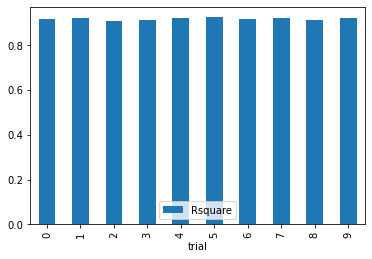

In [18]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [19]:
print(rdf['Rsquare'].mean())

0.9192063412873003


As you can see we have an r-squared of .92, meaning that the data almost perfectly correlated with eachother. Meaning that my R-square did improve.

### Now load the Professor Salary dataset


In [20]:
df = pd.read_csv("Salaries1.csv")
df.shape

(401, 6)

### Let's fix the Null and remove the outliers

In [21]:
df = df.dropna()
df = df[df.Salary < 500000]
df = df[df.YrsOfService < 80]
print(df.shape)
df.isnull().any()

(397, 6)


Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

### Question 5: Build a one factor Linear regression model to predict the salary using the factor that has the highest correlation with the salary. Does your model pass cross validaton?

Type your code here

In [22]:
df.corr().filter(items = ['Salary']).sort_values('Salary', ascending = False)

,Salary
Salary,1.000000
YrsSincePhd,0.419231
YrsOfService,0.334745


In [23]:
XArray = df['YrsSincePhd'].values
YArray = df['Salary'].values
X = XArray.reshape(-1, 1)
Y = YArray.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)

[92633.26747104]
[[972.19368437]]


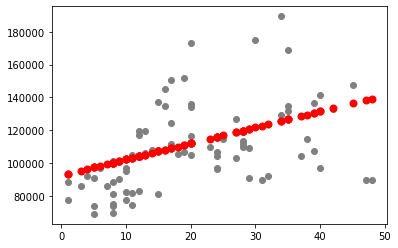

Mean Absolute Error: 17210.80150252324
Mean Squared Error: 517516361.16954327
Root Mean Squared Error: 22748.985937169666
R-squared: 0.20520268514819595


In [24]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test, color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

0.13633438549576343


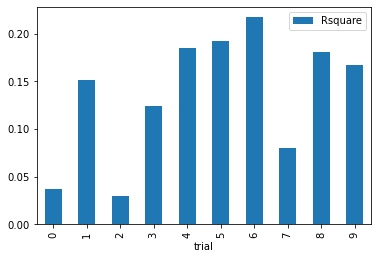

In [25]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')
print(rdf['Rsquare'].mean())

The model doesn't pass validation.

### Good Job.

### Part B:  Let's build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [49]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [50]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [51]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [52]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


#### Let's do some exploratory data analysis. First check and remove missing values

In [53]:
df.isnull().any()



rate_marriage      False
age                 True
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
had_affair         False
dtype: bool

# Finding outliers.

3820    5.0
3678    5.0
3673    5.0
3672    5.0
3671    5.0
       ... 
801     1.0
2918    1.0
2920    1.0
1929    1.0
1881    1.0
Name: rate_marriage, Length: 6471, dtype: float64

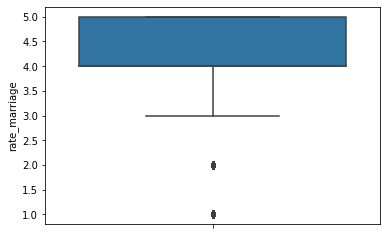

In [54]:
sns.boxplot(y=df['rate_marriage'])
df.rate_marriage.sort_values(ascending=False)

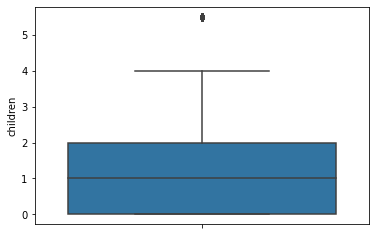

In [55]:
sns.boxplot(y=df['children'])
df = df[df['children'] <= 5]

I dropped the values of any child greater than 5 becuase there were cases of people having 5.5 children which is impossible.

### Question 6: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing valuess

Type your work here

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
had_affair         False
dtype: bool

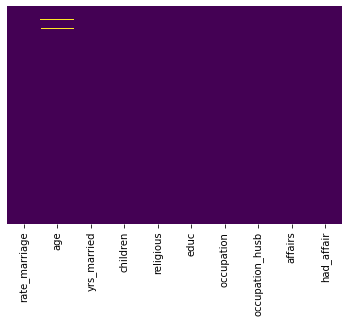

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df = df.dropna()
df.isnull().any()


<AxesSubplot:>

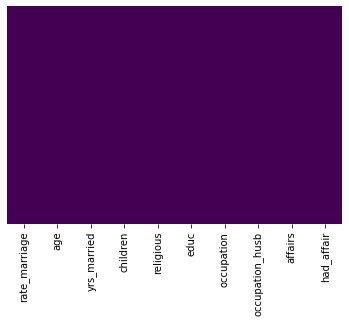

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


### Now, let's group by has or no affairs rows

In [58]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs
had_affair,,,,,,,,
0,4.333015,28.061829,7.607902,1.112676,2.493674,14.345429,3.826689,0.000000
1,3.654002,30.204914,10.776089,1.578014,2.247214,13.982270,3.884498,2.238292


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

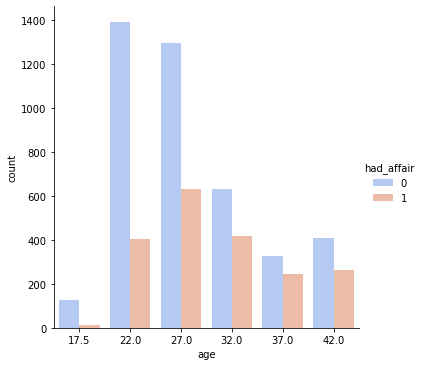

In [59]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

We can do the same thing for other variables such as years of marriage, number of children etc

### Question 7: Call factorplot for years of marriage, and number of children. Comment on whether you think they are important factors

I would assume the more years married you are, the more children you'll have than average. This is because I would think it would take about a year for you have your first kid. Odds are it wont be twins or greater. Therefore you'll have a low amount of kids for the first couple of years and then maxing out to an average of 2-3 kids after 10+ years.

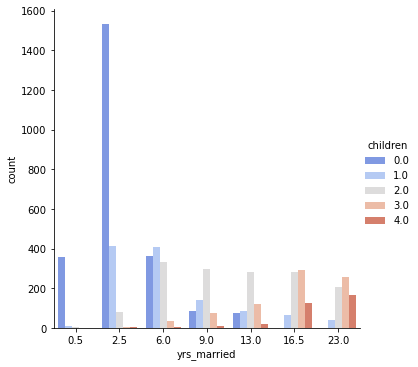

In [60]:
# Use Factorplot for age
sns.factorplot('yrs_married', kind='count', hue='children', data=df,palette='coolwarm')

### Question 8: build a logistic regression model with only Age, Number of years married, number of children, education to forecast had_affair. Remember to do the Train Test Split first and show the model performance results

type your work here

In [61]:
df2 = pd.DataFrame([df.yrs_married, df.children, df.age, df.educ, df.had_affair]).transpose()
df2.head()

,yrs_married,children,age,educ,had_affair
0,9.0,3.0,32.0,17.0,1.0
1,13.0,3.0,27.0,14.0,1.0
2,2.5,0.0,22.0,16.0,1.0
3,16.5,4.0,37.0,16.0,1.0
4,9.0,1.0,27.0,14.0,1.0


In [62]:
Xarray = df2[['yrs_married', 'children', 'age', 'educ']].values
Yarray = df2['had_affair'].values
X = Xarray.reshape(-1,4)
Y = Yarray.reshape(-1,1)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)
print(model1.intercept_)
print(model1.coef_)

[0.5210282]
[[ 0.09558072  0.03932467 -0.0488967  -0.05453162]]


In [64]:
from sklearn.metrics import classification_report, accuracy_score
Y_pred = model1.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79       842
         1.0       0.39      0.11      0.17       391

    accuracy                           0.66      1233
   macro avg       0.54      0.52      0.48      1233
weighted avg       0.59      0.66      0.59      1233

0.6626115166261152


We now have a 66% accuracy for our model. Which isn't the best but isn't the worst. The concerning part is 1.0 having very flow scores overall.

### Question 9: Now, call a countplot to show the dependence of the affair on occupation and create dummies variable for the occupation categorical variable. Repeat for the religious variable. Then finally include both of these categorical variables to build a better model

In [65]:
affair = df['affairs']
df3 = pd.concat([affair,df['occupation']], axis =1)
df3 = df3.fillna(1)
df3

,affairs,occupation
0,0.111111,occ2
1,3.230769,occ3
2,1.400000,occ3
3,0.727273,occ5
4,4.666666,occ3
...,...,...
6466,0.000000,occ4
6467,0.000000,occ5
6468,0.000000,occ3
6469,0.000000,occ3


In [66]:
affair = df[df['affairs'] == 0]
affair = affair['affairs']
df3 = pd.concat([affair,df['occupation']], axis =1)
df3 = df3.fillna(1)
df3

,affairs,occupation
0,1.0,occ2
1,1.0,occ3
2,1.0,occ3
3,1.0,occ5
4,1.0,occ3
...,...,...
6466,0.0,occ4
6467,0.0,occ5
6468,0.0,occ3
6469,0.0,occ3


<AxesSubplot:xlabel='occupation', ylabel='count'>

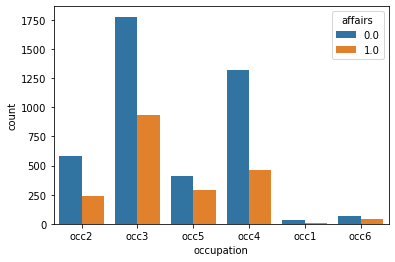

In [67]:
sns.countplot(x='occupation',hue='affairs',data=df3)

In [71]:
df4 = pd.concat([affair,df['religious']], axis =1)
df4 = df4.fillna(1)
df4

,affairs,religious
0,1.0,3.0
1,1.0,1.0
2,1.0,1.0
3,1.0,3.0
4,1.0,1.0
...,...,...
6466,0.0,3.0
6467,0.0,1.0
6468,0.0,2.0
6469,0.0,3.0


<AxesSubplot:xlabel='religious', ylabel='count'>

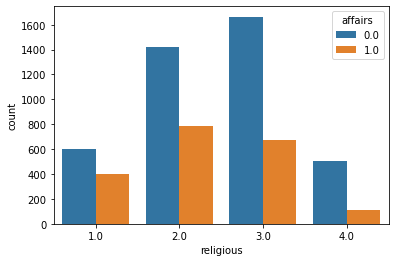

In [72]:
sns.countplot(x='religious',hue='affairs',data=df4)



In [78]:
df5 = df4.groupby(['affairs','religious'])
df5.size()

affairs  religious
0.0      1.0           604
         2.0          1417
         3.0          1664
         4.0           504
1.0      1.0           404
         2.0           786
         3.0           676
         4.0           108
dtype: int64

In [89]:
oneodds = 404/(604+404)
oneodds = "{:.0%}".format(oneodds)

twoodds = 786/(786+1417)
twoodds = "{:.0%}".format(twoodds)


threeodds = 676/(676+1664)
threeodds = "{:.0%}".format(threeodds)

fourodds =  108/(108+504)
fourodds = "{:.0%}".format(fourodds)

religousodds = (786+676+108)/(786+1417+676+1664+108+504)
religousodds = "{:.0%}".format(religousodds)

print("Probability of having an affair by religion")
print("Religion 1.0 = " + str(oneodds))
print("Religion 2.0 = " + str(twoodds))
print("Religion 3.0 = " + str(threeodds))
print("Religion 4.0 = " + str(fourodds))
print("religous vs not religious odds = " + str(religousodds))


Probability of having an affair by religion
Religion 1.0 = 40%
Religion 2.0 = 36%
Religion 3.0 = 29%
Religion 4.0 = 18%
religous vs not religious odds = 30%


In [79]:
df6 = df3.groupby(['occupation', 'affairs'])
df6.size()

occupation  affairs
occ1        0.0          33
            1.0           7
occ2        0.0         578
            1.0         235
occ3        0.0        1778
            1.0         937
occ4        0.0        1321
            1.0         462
occ5        0.0         410
            1.0         294
occ6        0.0          69
            1.0          39
dtype: int64

In [88]:
occ1odds = 7/(33+4)
occ1odds = "{:.0%}".format(occ1odds)

occ2odds = 235/(235+578)
occ2odds = "{:.0%}".format(occ2odds)

occ3odds = 937/(937+1778)
occ3odds = "{:.0%}".format(occ3odds)

occ4odds = 462/(452+1321)
occ4odds = "{:.0%}".format(occ4odds)

occ5odds = 294/(294+410)
occ5odds = "{:.0%}".format(occ5odds)

occ6odds = 39/(69+39)
occ6odds = "{:.0%}".format(occ6odds)


print("Probability of having an affair by occupation")
print("Occupation 1.0 = " + str(occ1odds))
print("Occupation 2.0 = " + str(occ2odds))
print("Occupation 3.0 = " + str(occ3odds))
print("Occupation 4.0 = " + str(occ4odds))
print("Occupation 5.0 = " + str(occ5odds))
print("Occupation 6.0 = " + str(occ6odds))


Probability of having an affair by occupation
Occupation 1.0 = 19%
Occupation 2.0 = 29%
Occupation 3.0 = 35%
Occupation 4.0 = 26%
Occupation 5.0 = 42%
Occupation 6.0 = 36%


## Question 10: Comment on your model results.

Type your answer

    Part B is a very odd case with many important factors. By having our data plotted out to be a boolean case for affairs against what type of religousness you are. Or on what job you have we can see some correlating results. If you are of religous type 1 being not religous. The odds of you having an affair is much higher compared to everyone else. If you are extremely religous the odds of you having an affair goes down dramatically. The odds of you having an affair if you're religious rather than not being religious. We can see that it's at a 10% decreased chance. Thus we can conclude that being religious will have a lower chance at being cheated on.
    For your job on the other hand we can see that if you are of job type 5 you have the highest odds of having an affair with a 42% chance. Unlike job 1.0 you with the lowes todds at 19% chance. Thus being a student is the most benoficial time to have a relationship without being worried about being cheated on. Unlike managers who seem to be cheated on the most.
 